In [1]:
import numpy as np
import xarray as xr
import netCDF4
import os
import datetime
import matplotlib.pyplot as plt 
from matplotlib import cm
import shutil
from datetime import datetime, timedelta
import glob
import datetime as dt
from os import path
import os
import cartopy.crs as ccrs
import fsspec
import git 
import json
import sys
import yaml
import requests
import cdsapi
from datetime import timezone



data from: https://www.datalakes-eawag.ch


In [2]:
output_folder="/Volumes/lexplore_hd/plots/Twitter/"

In [3]:
today= datetime.today()
endyear=today.year
today_string2=datetime.today().strftime('%Y-%m-%d')


In [4]:
def rm_point(files):
    f=[]
    for i in range(len(files)):
        if not files[i].startswith("."):
            f.append(files[i])
    return f

In [5]:
plt.style.use('dark_background')

### thetis

In [6]:
os.chdir("/Volumes/lexplore_hd/core_data/thetis-multi-instrument-profiler/data/")

In [7]:
!python /Volumes/lexplore_hd/core_data/thetis-multi-instrument-profiler/scripts/download_remote_data.py -w



Attempting to sync s3://eawag-data/renkulab.io/lexplore/thetis-multi-instrument-profiler/data with /Volumes/lexplore_hd/core_data/thetis-multi-instrument-profiler/data
download: s3://eawag-data/renkulab.io/lexplore/thetis-multi-instrument-profiler/data/Level2/L2_THETIS_GRID_20191202_20191212.nc to Level2/L2_THETIS_GRID_20191202_20191212.nc

Download complete.


In [8]:

!rm /Volumes/lexplore_hd/core_data/thetis-multi-instrument-profiler/data/Level2/L2_THETIS_GRID_20191202_20191212.nc
#rm /Volumes/lexplore_hd/core_data/thetis-multi-instrument-profiler/data/Level2/L2_THETIS_GRID_20210922_20211002.nc
#L2_THETIS_GRID_20220907_20220917.nc

In [9]:
data_folder="/Volumes/lexplore_hd/core_data/thetis-multi-instrument-profiler/data/Level2/"
file_list=os.listdir(data_folder)
file_list=rm_point(file_list)
for i in range(len(file_list)):
    file_list[i]=data_folder+file_list[i]
vars=["temp","do","dosat","chla","bb700"]
read_file_list=[]
for file in file_list:
    file=xr.open_dataset(file)
    file=file[vars]
    read_file_list.append(file)
thetis_all=xr.merge(read_file_list)


In [10]:
thetis_all.coords['depth'] = (thetis_all.coords['depth'] * -1)


#thetis_monthly=thetis_all.resample(time='1M').mean()
thetis_daily=thetis_all.resample(time='1D').mean()

In [11]:
thetis_daily_2019=thetis_daily.sel(time=slice("2019-01-01", "2019-12-31")).sel(depth=-2,method="nearest").temp[0:365]
thetis_daily_2020=thetis_daily.sel(time=slice("2020-01-01", "2020-12-31")).sel(depth=-2,method="nearest").temp[0:365]
thetis_daily_2021=thetis_daily.sel(time=slice("2021-01-01", "2021-12-31")).sel(depth=-2,method="nearest").temp[0:365]
thetis_daily_2022=thetis_daily.sel(time=slice("2022-01-01", "2022-12-31")).sel(depth=-2,method="nearest").temp[0:365]
thetis_daily_2023=thetis_daily.sel(time=slice("2023-01-01", today_string2)).sel(depth=-2,method="nearest")

In [12]:
thetis_daily_2020["time"] = ("time", thetis_daily_2019.time.values)#
thetis_daily_2021["time"] = ("time", thetis_daily_2019.time.values)#
thetis_daily_2022["time"] = ("time", thetis_daily_2019.time.values)#
thetis_daily_2023["time"] = ("time", thetis_daily_2019.time.values[0:len(thetis_daily_2023.time.values)])#

/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


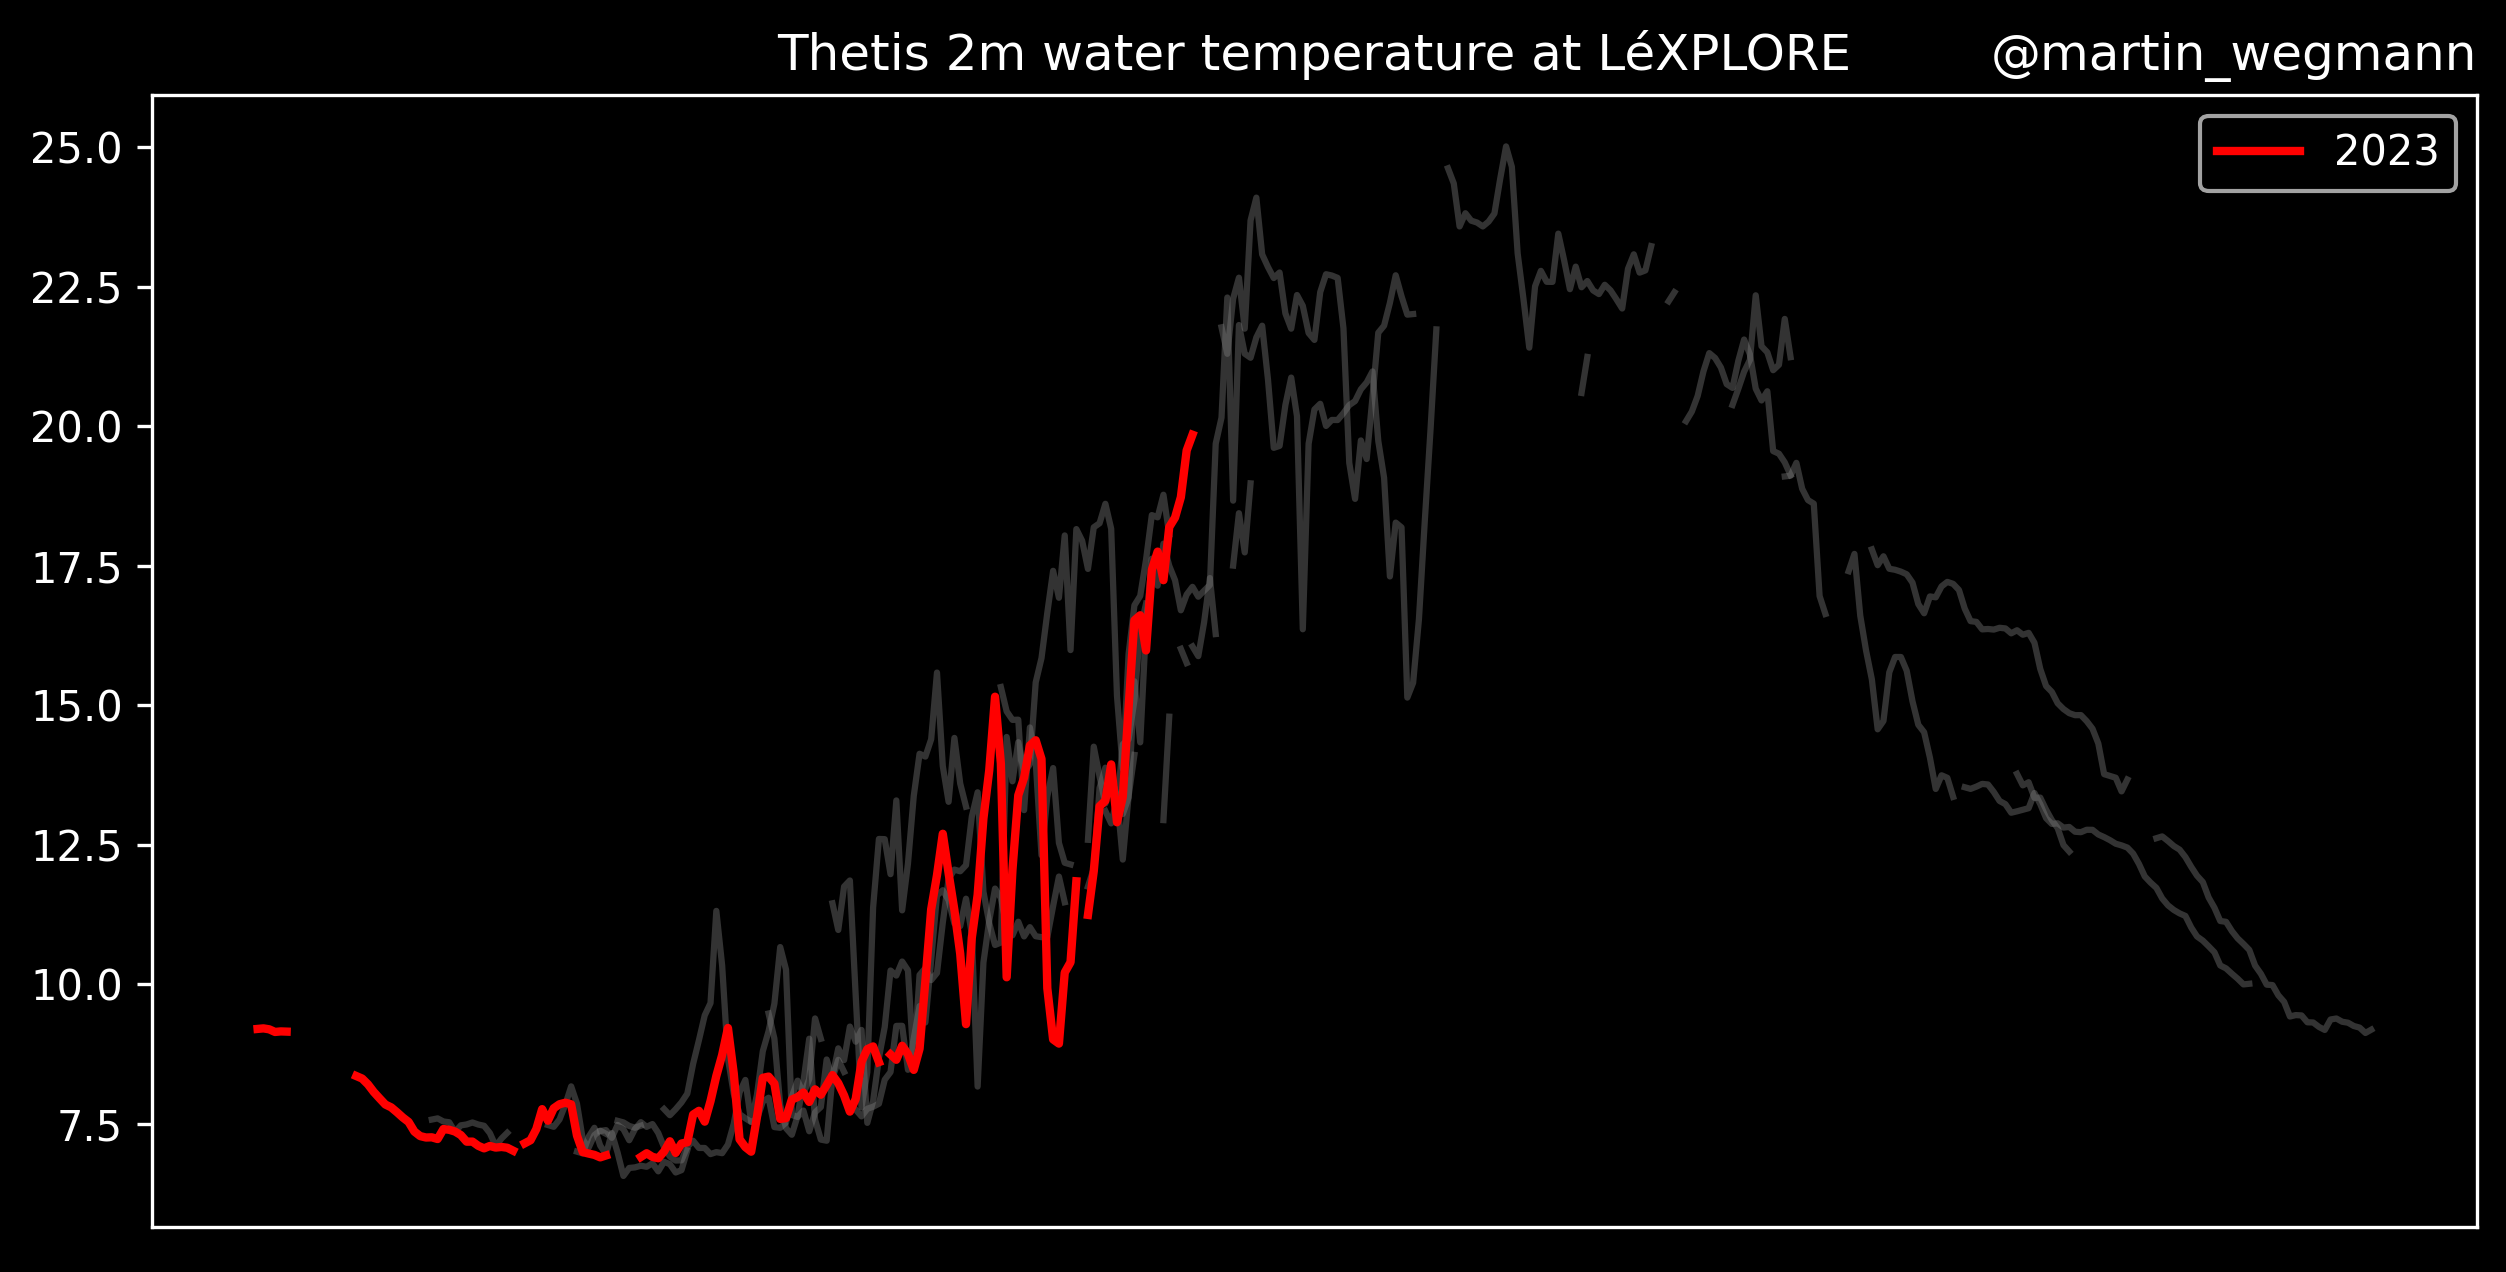

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5), dpi= 300)
thetis_daily_2019.plot(color="gray", alpha=0.4)
thetis_daily_2020.plot(color="gray", alpha=0.4)
thetis_daily_2021.plot(color="gray", alpha=0.4)
thetis_daily_2022.plot(color="gray", alpha=0.4)
thetis_daily_2023.temp.plot(color="red",lw=2,label="2023")
plt.xlabel("")
plt.ylabel("")
#plt.xticks(rotation = 90)
ax = plt.gca()
ax.set_xticklabels(['01-01', '', '',"","","",'31-12'])
ax.set_xticks([])
dataset="Thetis"
variable="2m water temperature"
region="LéXPLORE"
copyright="@martin_wegmann"
title=dataset+" "+variable+" at "+region
plt.title(title)
plt.title(copyright,loc="right")
plt.legend()


plt.savefig(output_folder+"daily_2m_temp_Thetis.pdf")
plt.savefig(output_folder+"daily_2m_temp_Thetis.png")






In [14]:
thetis_daily_2019_chla=thetis_daily.sel(time=slice("2019-01-01", "2019-12-31")).sel(depth=-2,method="nearest").chla[0:365]
thetis_daily_2020_chla=thetis_daily.sel(time=slice("2020-01-01", "2020-12-31")).sel(depth=-2,method="nearest").chla[0:365]
thetis_daily_2021_chla=thetis_daily.sel(time=slice("2021-01-01", "2021-12-31")).sel(depth=-2,method="nearest").chla[0:365]
thetis_daily_2022_chla=thetis_daily.sel(time=slice("2022-01-01", "2022-12-31")).sel(depth=-2,method="nearest").chla[0:365]
thetis_daily_2023_chla=thetis_daily.sel(time=slice("2023-01-01", today_string2)).sel(depth=-2,method="nearest")

In [15]:
thetis_daily_2020_chla["time"] = ("time", thetis_daily_2019_chla.time.values)#
thetis_daily_2021_chla["time"] = ("time", thetis_daily_2019_chla.time.values)#
thetis_daily_2022_chla["time"] = ("time", thetis_daily_2019_chla.time.values)#
thetis_daily_2023_chla["time"] = ("time", thetis_daily_2019_chla.time.values[0:len(thetis_daily_2023_chla.time.values)])#

/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


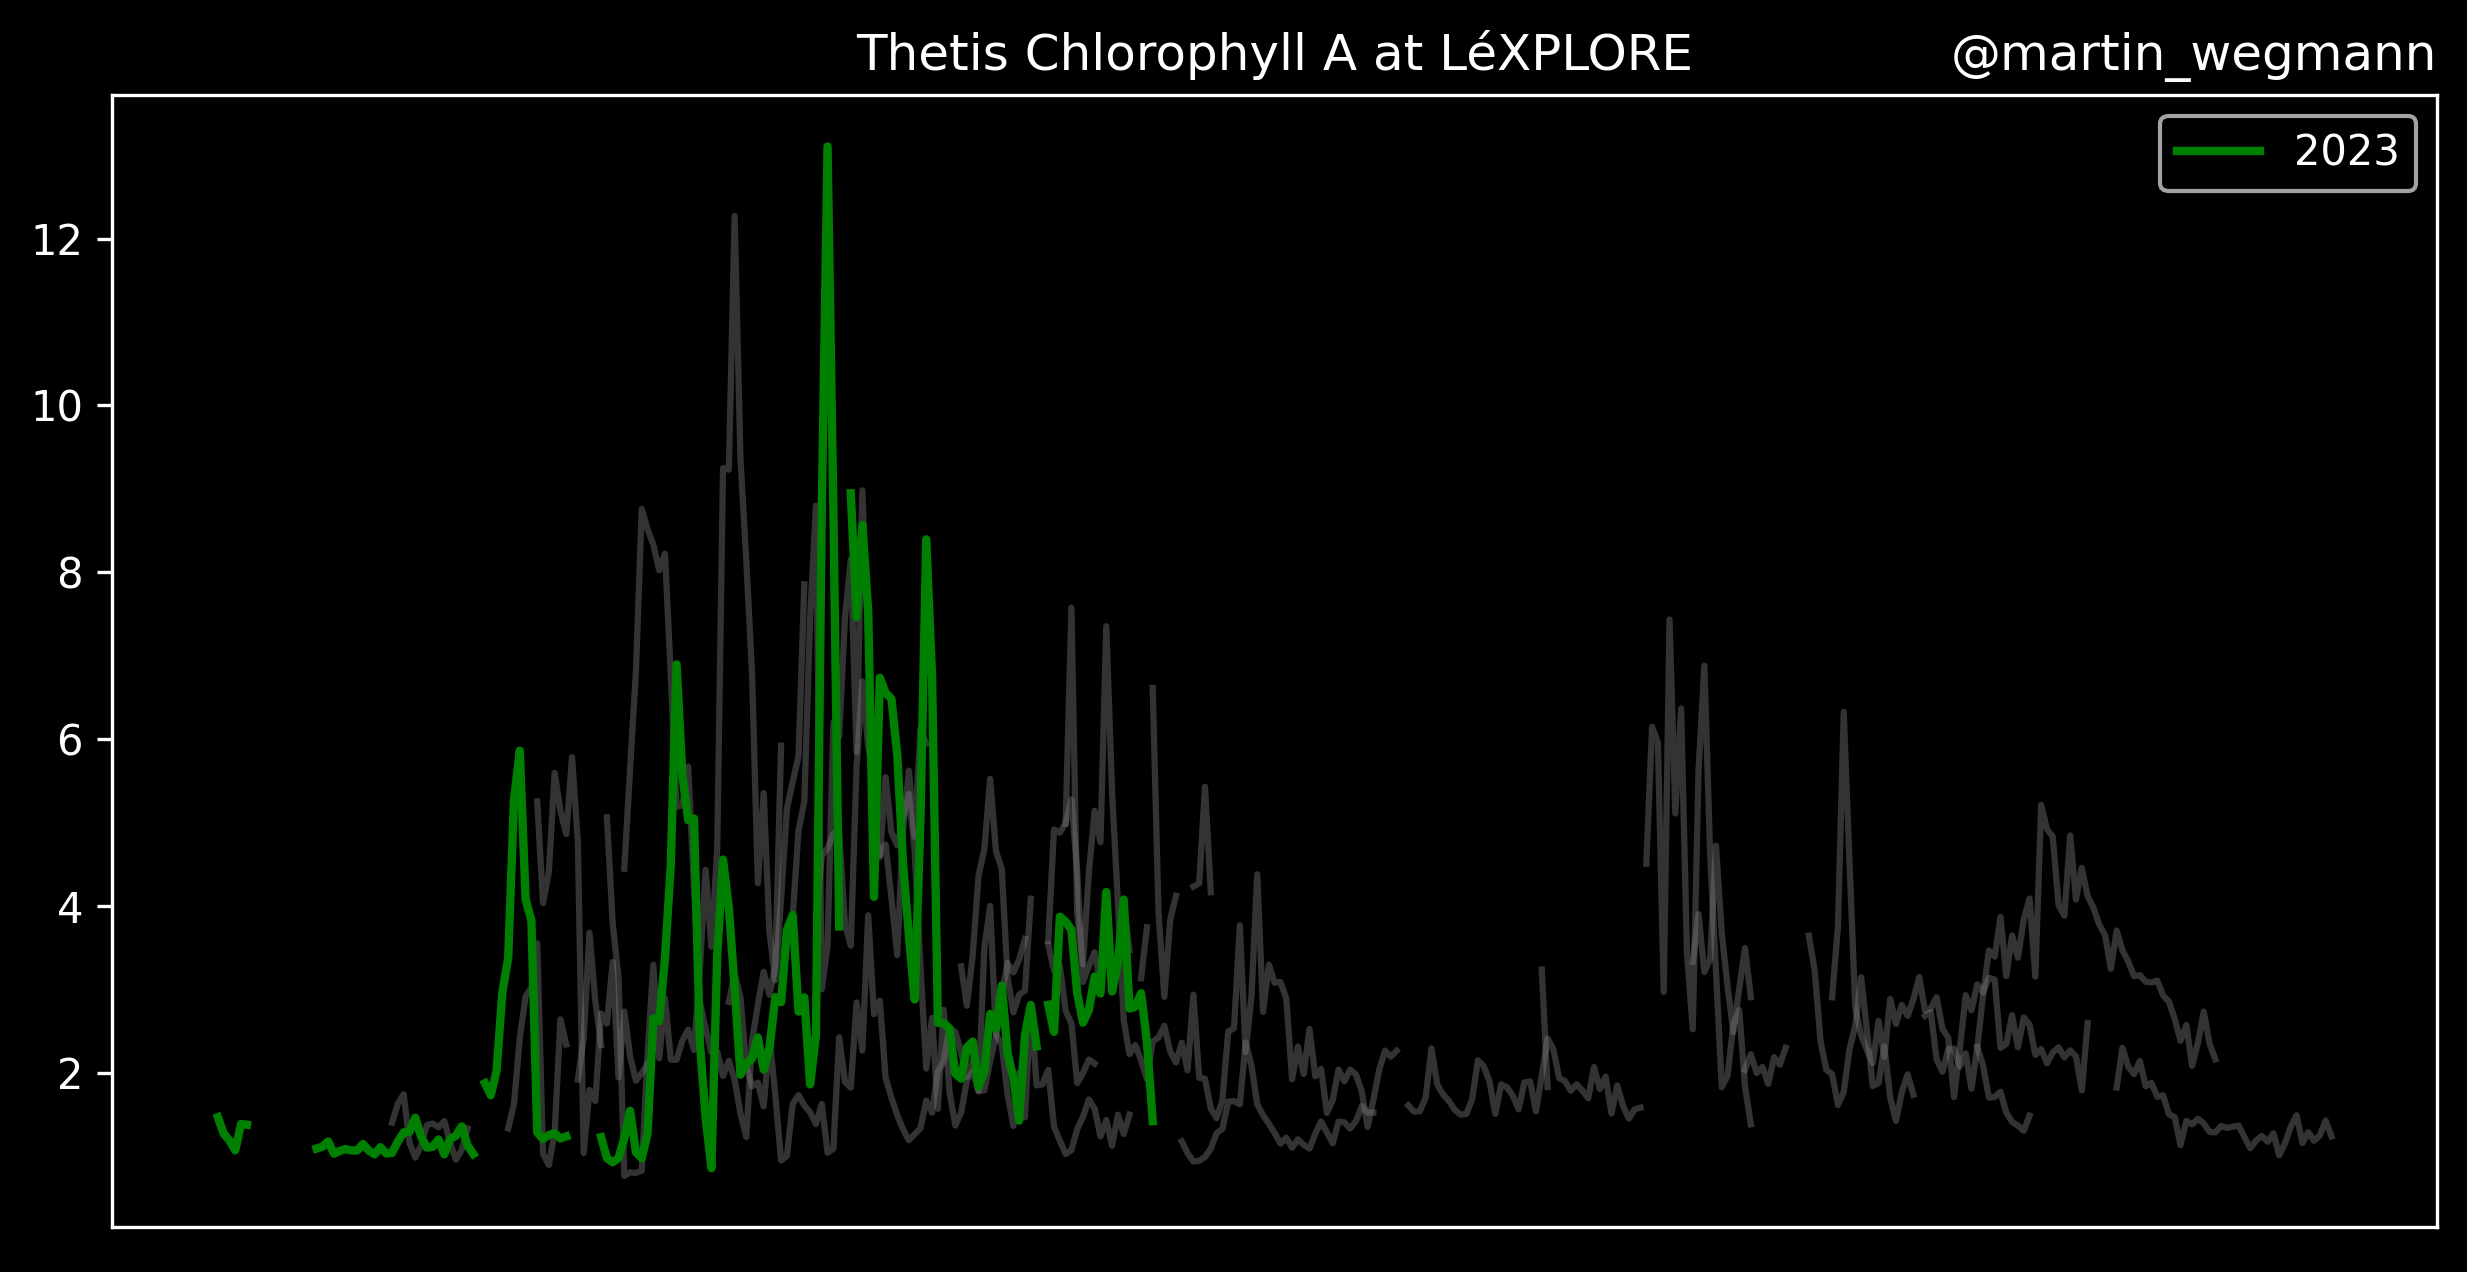

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5), dpi= 300)
thetis_daily_2019_chla.plot(color="gray", alpha=0.4)
thetis_daily_2020_chla.plot(color="gray", alpha=0.4)
thetis_daily_2021_chla.plot(color="gray", alpha=0.4)
thetis_daily_2022_chla.plot(color="gray", alpha=0.4)
thetis_daily_2023_chla.chla.plot(color="green",lw=2,label="2023")
plt.title("")
plt.xlabel("")
plt.ylabel("")
#plt.xticks(rotation = 90)
ax = plt.gca()
ax.set_xticklabels(['01-01', '', '',"","","",'31-12'])
ax.set_xticks([])
dataset="Thetis"
variable="Chlorophyll A"
region="LéXPLORE"
copyright="@martin_wegmann"
title=dataset+" "+variable+" at "+region
plt.title(title)
plt.title(copyright,loc="right")
plt.legend()


### idronaut

In [17]:
os.chdir("/Volumes/lexplore_hd/core_data/idronaut-automatic-profiler/data/")

In [18]:
!python /Volumes/lexplore_hd/core_data/idronaut-automatic-profiler/scripts/download_remote_data.py -w



Attempting to sync s3://eawag-data/renkulab.io/lexplore/idronaut-automatic-profiler/data with /Volumes/lexplore_hd/core_data/idronaut-automatic-profiler/data
Download complete.


In [19]:
idronaut_folder_L2="/Volumes/lexplore_hd/core_data/idronaut-automatic-profiler/data/Level2/"
files_L2 = [idronaut_folder_L2+filename for filename in rm_point(os.listdir(idronaut_folder_L2))]

In [20]:
idronaut_L2=xr.open_mfdataset(files_L2,engine="netcdf4")

In [21]:
idronaut_daily=idronaut_L2.resample(time="1D").mean()

In [22]:
idronaut_daily_2020=idronaut_daily.sel(time=slice("2020-01-01", "2020-12-31")).sel(Press=2,method="nearest").Temp[0:365]
idronaut_daily_2021=idronaut_daily.sel(time=slice("2021-01-01", "2021-12-31")).sel(Press=2,method="nearest").Temp[0:365]
idronaut_daily_2022=idronaut_daily.sel(time=slice("2022-01-01", "2022-12-31")).sel(Press=2,method="nearest").Temp[0:365]
idronaut_daily_2023=idronaut_daily.sel(time=slice("2023-01-01", today_string2)).sel(Press=2,method="nearest")

In [23]:
idronaut_daily_2020["time"] = ("time", idronaut_daily_2021.sel(time=slice("2021-06-29", "2021-12-31")).time.values)#
idronaut_daily_2022["time"] = ("time", idronaut_daily_2021.time.values)#
idronaut_daily_2023["time"] = ("time", idronaut_daily_2021.time.values[0:len(idronaut_daily_2023.time.values)])#

/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


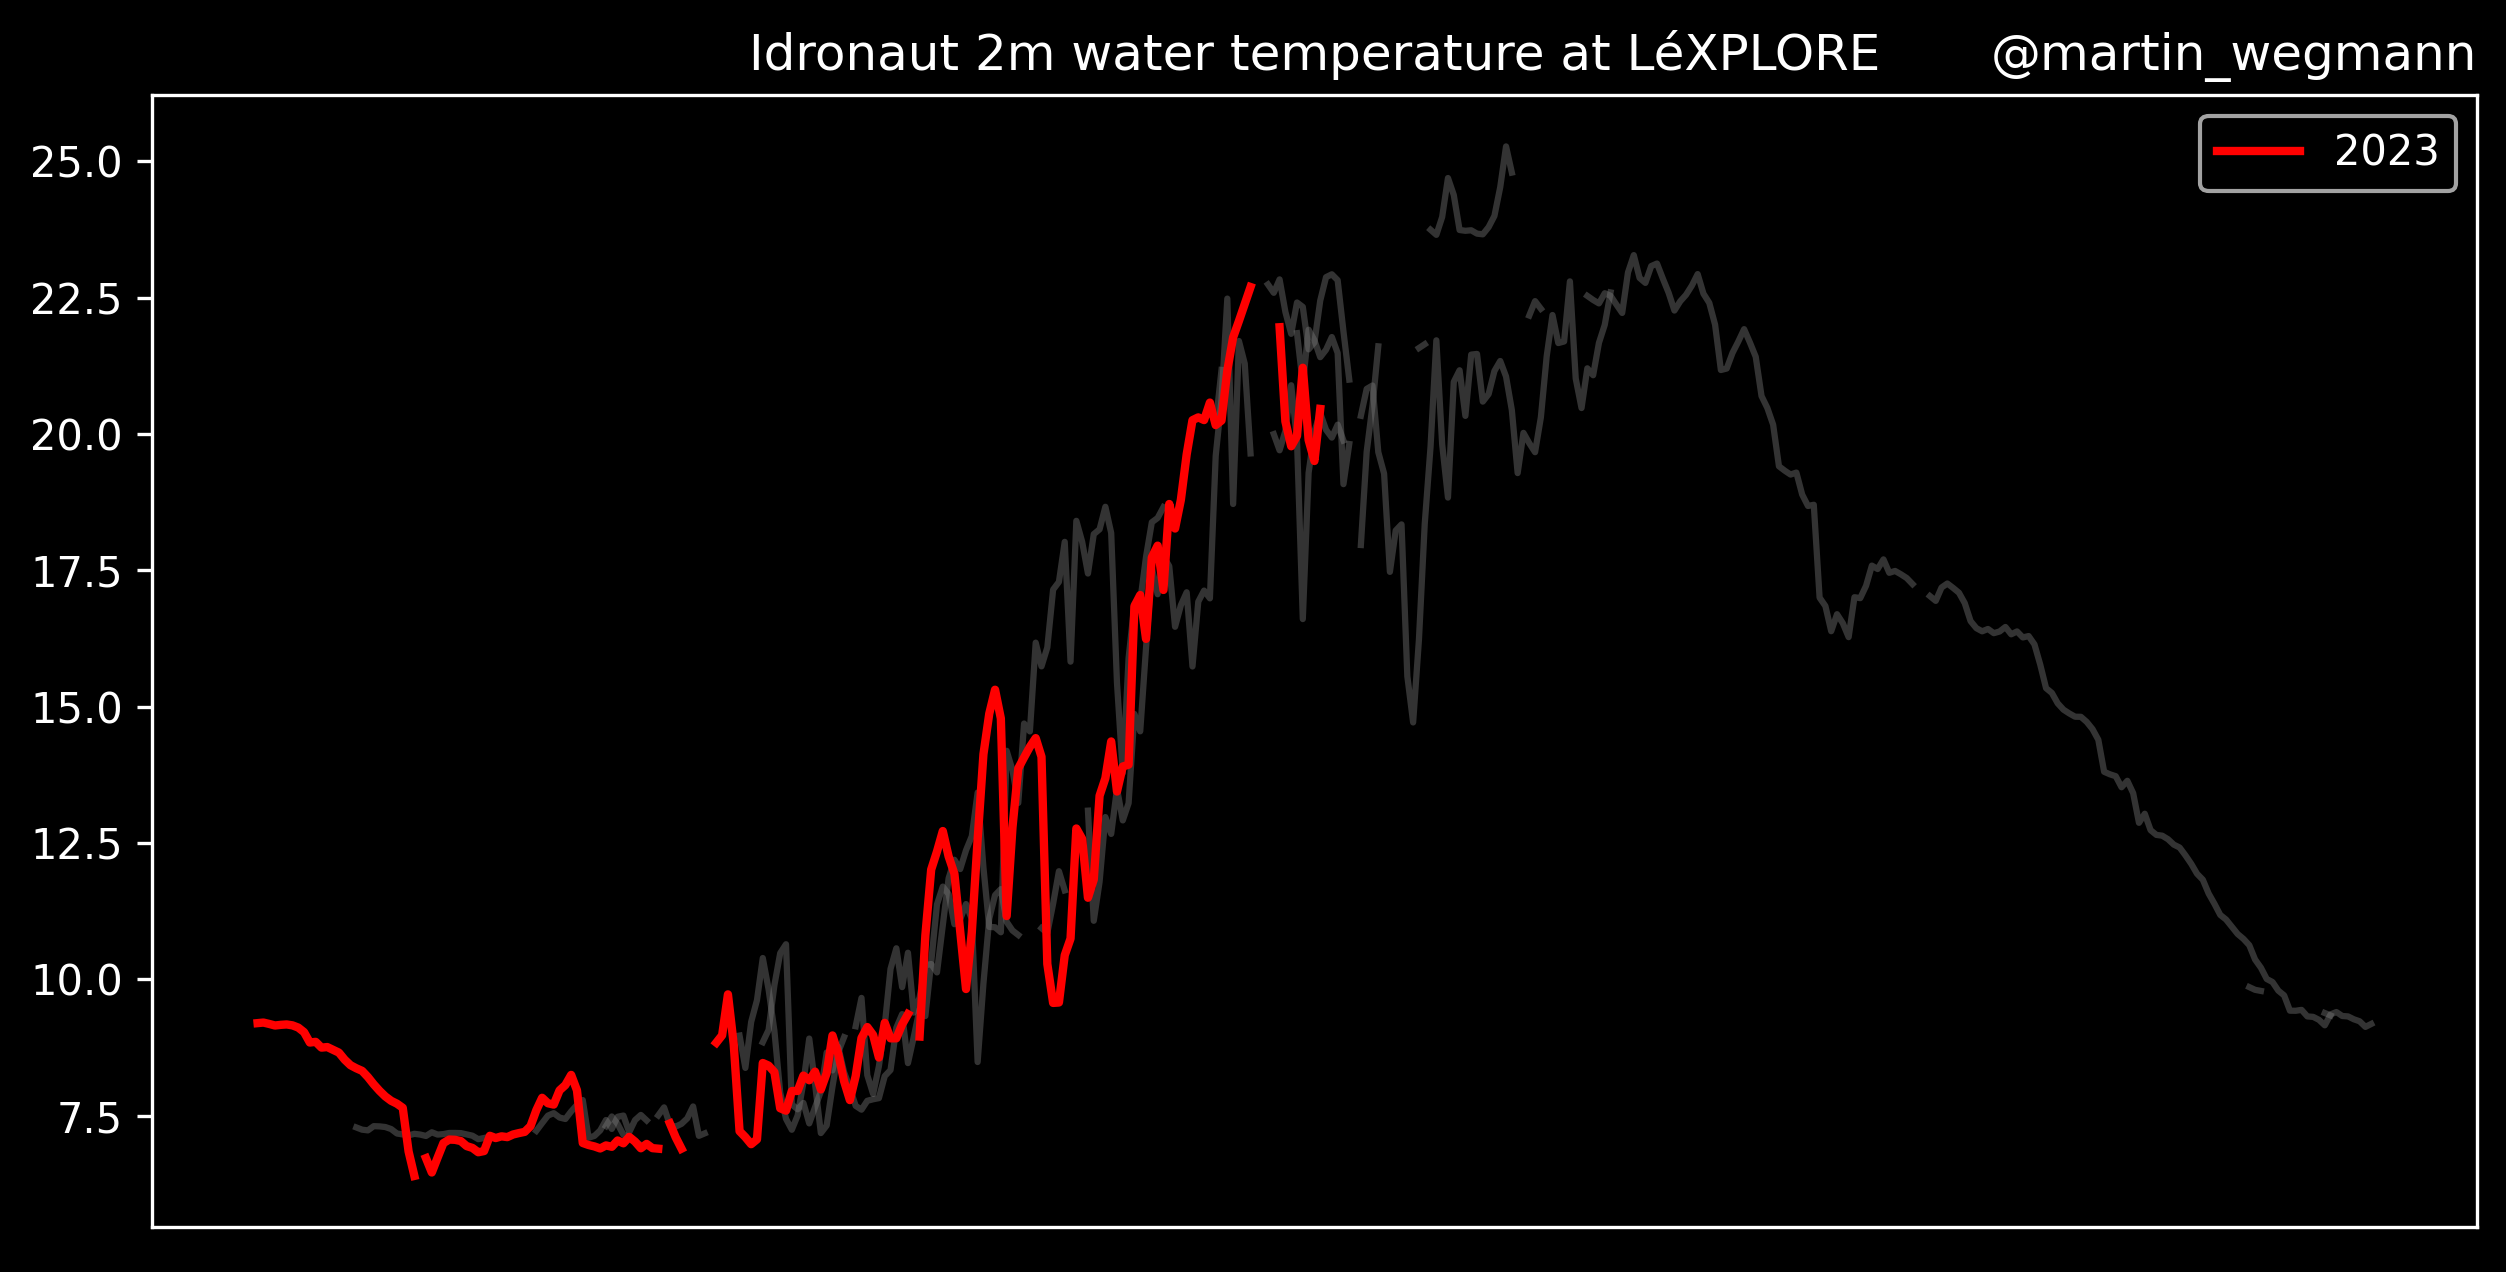

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5), dpi= 300)
idronaut_daily_2020.plot(color="gray", alpha=0.4)
idronaut_daily_2021.plot(color="gray", alpha=0.4)
idronaut_daily_2022.plot(color="gray", alpha=0.4)
idronaut_daily_2023.Temp.plot(color="red",lw=2,label="2023")
plt.title("")
plt.xlabel("")
plt.ylabel("")
#plt.xticks(rotation = 90)
ax = plt.gca()
ax.set_xticklabels(['01-01', '', '',"","","",'31-12'])
ax.set_xticks([])
dataset="Idronaut"
variable="2m water temperature"
region="LéXPLORE"
copyright="@martin_wegmann"
title=dataset+" "+variable+" at "+region
plt.title(title)
plt.title(copyright,loc="right")
plt.legend()



plt.savefig(output_folder+"daily_2m_temp_idronaut.pdf")
plt.savefig(output_folder+"daily_2m_temp_idronaut.png")







### tchain

In [25]:
os.chdir("/Volumes/lexplore_hd/core_data/thermister-chain/data/")

In [26]:
!python /Volumes/lexplore_hd/core_data/thermister-chain/scripts/download_remote_data.py -w



Attempting to sync s3://eawag-data/renkulab.io/lexplore/thermister-chain/data with /Volumes/lexplore_hd/core_data/thermister-chain/data
download: s3://eawag-data/renkulab.io/lexplore/thermister-chain/data/Level0/v2/LeXPLORE_EAST_TempChain_2023-07-04.dat to Level0/v2/LeXPLORE_EAST_TempChain_2023-07-04.dat

download: s3://eawag-data/renkulab.io/lexplore/thermister-chain/data/Level2/L2_LexploreTemperatureChain_v2_20230701_000000.nc to Level2/L2_LexploreTemperatureChain_v2_20230701_000000.nc

download: s3://eawag-data/renkulab.io/lexplore/thermister-chain/data/Level1/L1_LexploreTemperatureChain_v2_20230703_000000.nc to Level1/L1_LexploreTemperatureChain_v2_20230703_000000.nc

Download complete.


In [27]:
tchain_folder_L1="/Volumes/lexplore_hd/core_data/thermister-chain/data/Level1/"
files_L1 = [tchain_folder_L1+filename for filename in rm_point(os.listdir(tchain_folder_L1))]

In [28]:
tchain_l1=xr.open_mfdataset(files_L1,engine="netcdf4")

In [29]:
tchain_l1_orig=tchain_l1.temp.where(tchain_l1.temp_qual==0)

In [30]:
tchain_l1_orig_daily=tchain_l1_orig.resample(time="1D").mean()

In [31]:
tchain_l1_orig_daily_2019=tchain_l1_orig_daily.sel(time=slice("2019-01-01", "2019-12-31")).sel(depth=2,method="nearest")[:-1]
tchain_l1_orig_daily_2020=tchain_l1_orig_daily.sel(time=slice("2020-01-01", "2020-12-31")).sel(depth=2,method="nearest")[0:365]
tchain_l1_orig_daily_2021=tchain_l1_orig_daily.sel(time=slice("2021-01-01", "2021-12-31")).sel(depth=2,method="nearest")[0:365]
tchain_l1_orig_daily_2022=tchain_l1_orig_daily.sel(time=slice("2022-01-01", "2022-12-31")).sel(depth=2,method="nearest")[0:365]
tchain_l1_orig_daily_2023=tchain_l1_orig_daily.sel(time=slice("2023-01-01", today_string2)).sel(depth=2,method="nearest")

In [32]:
tchain_l1_orig_daily_2019["time"] = ("time", tchain_l1_orig_daily_2020.sel(time=slice("2020-06-19", "2020-12-31")).time.values)#
tchain_l1_orig_daily_2021["time"] = ("time", tchain_l1_orig_daily_2020.time.values)#
tchain_l1_orig_daily_2022["time"] = ("time", tchain_l1_orig_daily_2020.time.values)#
tchain_l1_orig_daily_2023["time"] = ("time", tchain_l1_orig_daily_2020.time.values[0:len(tchain_l1_orig_daily_2023.time.values)])#

/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/ipykern

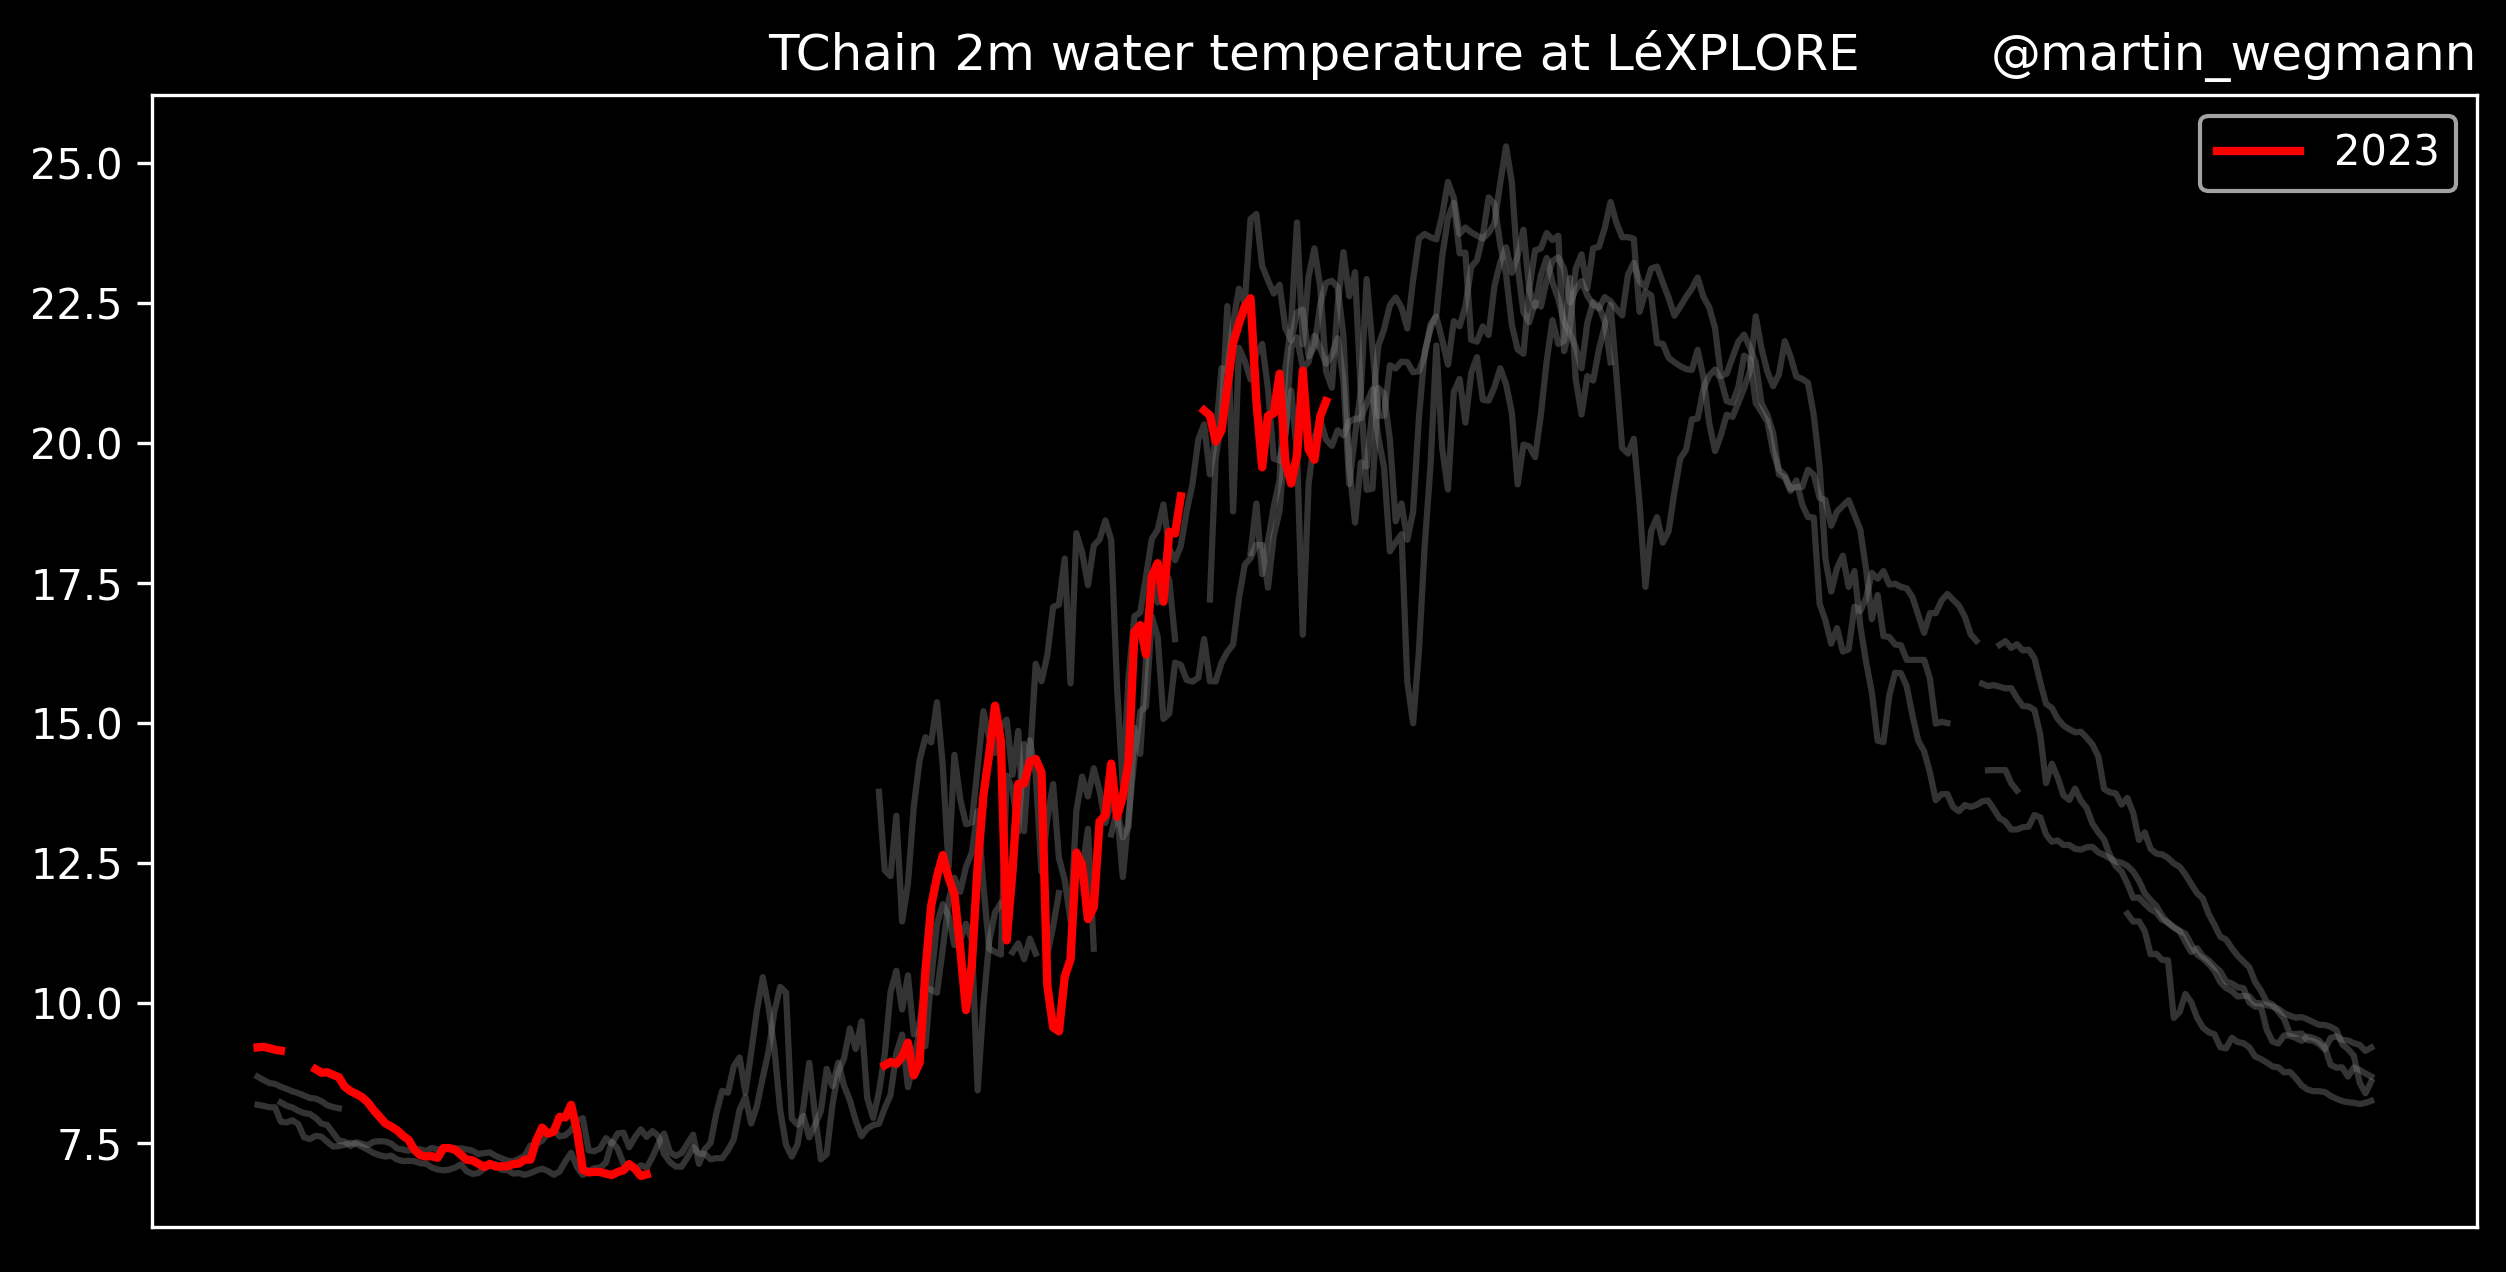

In [33]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5), dpi= 300)
tchain_l1_orig_daily_2019.plot(color="gray", alpha=0.4)
tchain_l1_orig_daily_2020.plot(color="gray", alpha=0.4)
tchain_l1_orig_daily_2021.plot(color="gray", alpha=0.4)
tchain_l1_orig_daily_2022.plot(color="gray", alpha=0.4)
tchain_l1_orig_daily_2023.plot(color="red",lw=2,label="2023")
plt.title("")
plt.xlabel("")
plt.ylabel("")
#plt.xticks(rotation = 90)
ax = plt.gca()
ax.set_xticklabels(['01-01', '', '',"","","",'31-12'])
ax.set_xticks([])
dataset="TChain"
variable="2m water temperature"
region="LéXPLORE"
copyright="@martin_wegmann"
title=dataset+" "+variable+" at "+region
plt.title(title)
plt.title(copyright,loc="right")
plt.legend()



plt.savefig(output_folder+"daily_2m_temp_TChain.pdf")
plt.savefig(output_folder+"daily_2m_temp_TChain.png")









In [34]:
tchain_l1_orig_daily_2019=tchain_l1_orig_daily.sel(time=slice("2019-01-01", "2019-12-31")).sel(depth=80,method="nearest")[:-1]
tchain_l1_orig_daily_2020=tchain_l1_orig_daily.sel(time=slice("2020-01-01", "2020-12-31")).sel(depth=80,method="nearest")[0:365]
tchain_l1_orig_daily_2021=tchain_l1_orig_daily.sel(time=slice("2021-01-01", "2021-12-31")).sel(depth=80,method="nearest")[0:365]
tchain_l1_orig_daily_2022=tchain_l1_orig_daily.sel(time=slice("2022-01-01", "2022-12-31")).sel(depth=80,method="nearest")[0:365]
tchain_l1_orig_daily_2023=tchain_l1_orig_daily.sel(time=slice("2023-01-01", today_string2)).sel(depth=80,method="nearest")

In [35]:
tchain_l1_orig_daily_2019["time"] = ("time", tchain_l1_orig_daily_2020.sel(time=slice("2020-06-19", "2020-12-31")).time.values)#
tchain_l1_orig_daily_2021["time"] = ("time", tchain_l1_orig_daily_2020.time.values)#
tchain_l1_orig_daily_2022["time"] = ("time", tchain_l1_orig_daily_2020.time.values)#
tchain_l1_orig_daily_2023["time"] = ("time", tchain_l1_orig_daily_2020.time.values[0:len(tchain_l1_orig_daily_2023.time.values)])#

/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/ipykern

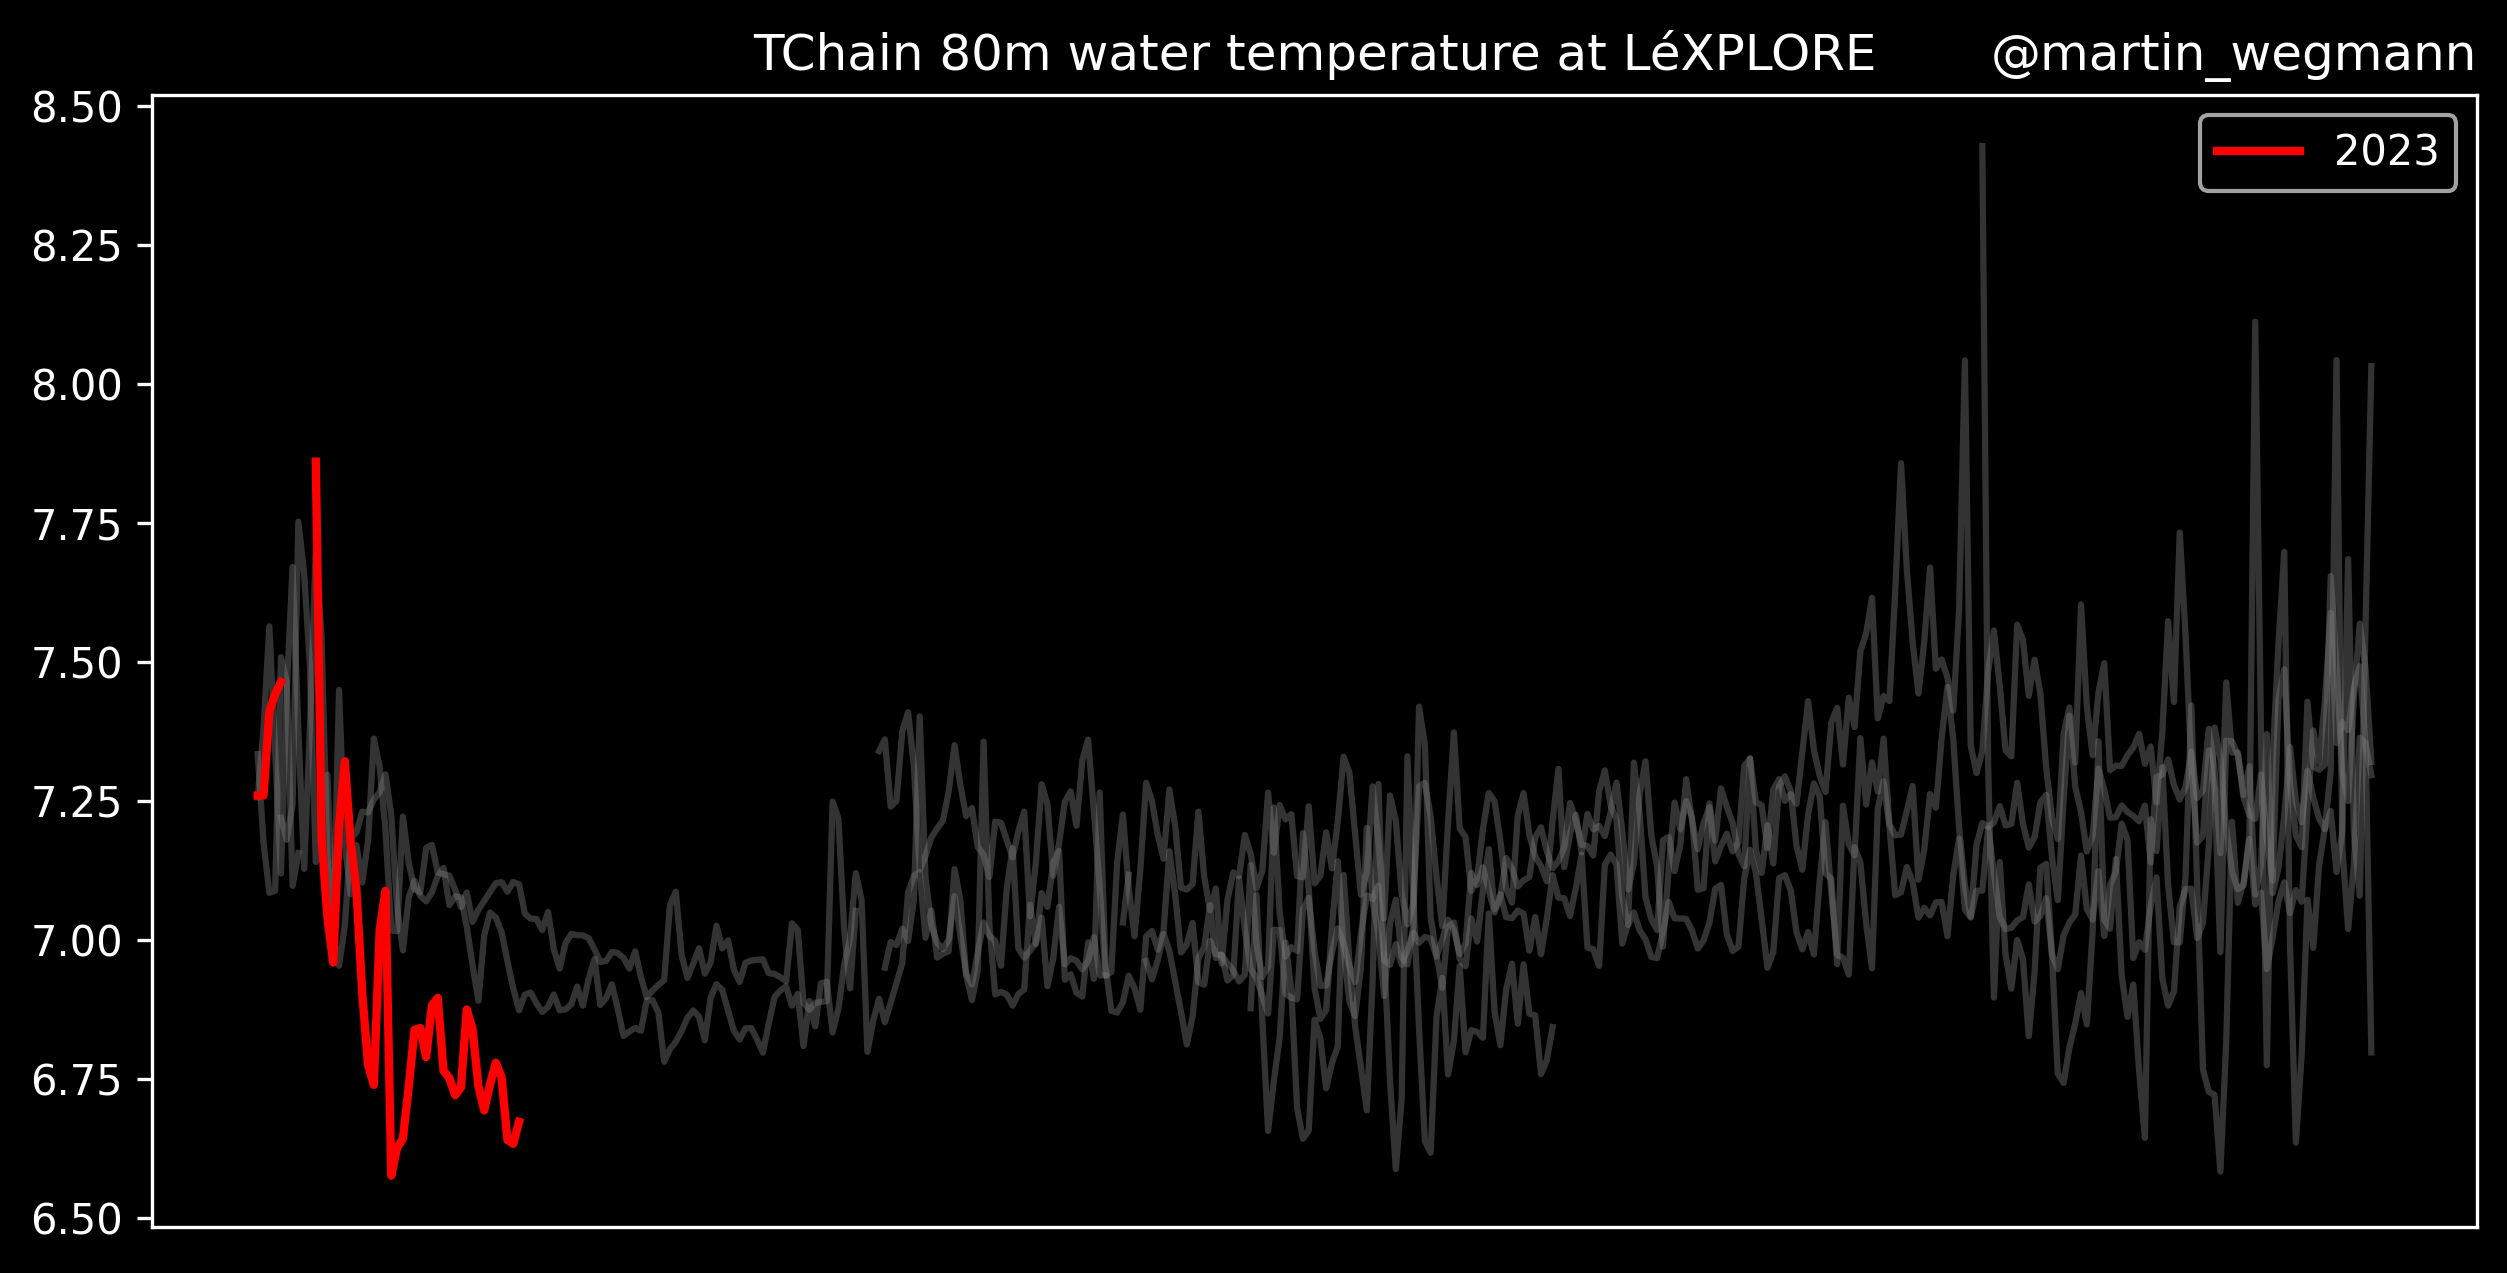

In [36]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5), dpi= 300)
tchain_l1_orig_daily_2019.plot(color="gray", alpha=0.4)
tchain_l1_orig_daily_2020.plot(color="gray", alpha=0.4)
tchain_l1_orig_daily_2021.plot(color="gray", alpha=0.4)
tchain_l1_orig_daily_2022.plot(color="gray", alpha=0.4)
tchain_l1_orig_daily_2023.plot(color="red",lw=2,label="2023")
plt.title("")
plt.xlabel("")
plt.ylabel("")
#plt.xticks(rotation = 90)
ax = plt.gca()
ax.set_xticklabels(['01-01', '', '',"","","",'31-12'])
ax.set_xticks([])
dataset="TChain"
variable="80m water temperature"
region="LéXPLORE"
copyright="@martin_wegmann"
title=dataset+" "+variable+" at "+region
plt.title(title)
plt.title(copyright,loc="right")
plt.legend()



plt.savefig(output_folder+"daily_80m_temp_TChain.pdf")
plt.savefig(output_folder+"daily_80m_temp_TChain.png")










In [37]:
tchain_l1_orig_daily_2019=tchain_l1_orig_daily.sel(time=slice("2019-01-01", "2019-12-31")).sel(depth=40,method="nearest")[:-1]
tchain_l1_orig_daily_2020=tchain_l1_orig_daily.sel(time=slice("2020-01-01", "2020-12-31")).sel(depth=40,method="nearest")[0:365]
tchain_l1_orig_daily_2021=tchain_l1_orig_daily.sel(time=slice("2021-01-01", "2021-12-31")).sel(depth=40,method="nearest")[0:365]
tchain_l1_orig_daily_2022=tchain_l1_orig_daily.sel(time=slice("2022-01-01", "2022-12-31")).sel(depth=40,method="nearest")[0:365]
tchain_l1_orig_daily_2023=tchain_l1_orig_daily.sel(time=slice("2023-01-01", today_string2)).sel(depth=40,method="nearest")

In [38]:
tchain_l1_orig_daily_2019["time"] = ("time", tchain_l1_orig_daily_2020.sel(time=slice("2020-06-19", "2020-12-31")).time.values)#
tchain_l1_orig_daily_2021["time"] = ("time", tchain_l1_orig_daily_2020.time.values)#
tchain_l1_orig_daily_2022["time"] = ("time", tchain_l1_orig_daily_2020.time.values)#
tchain_l1_orig_daily_2023["time"] = ("time", tchain_l1_orig_daily_2020.time.values[0:len(tchain_l1_orig_daily_2023.time.values)])#

/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/ipykern

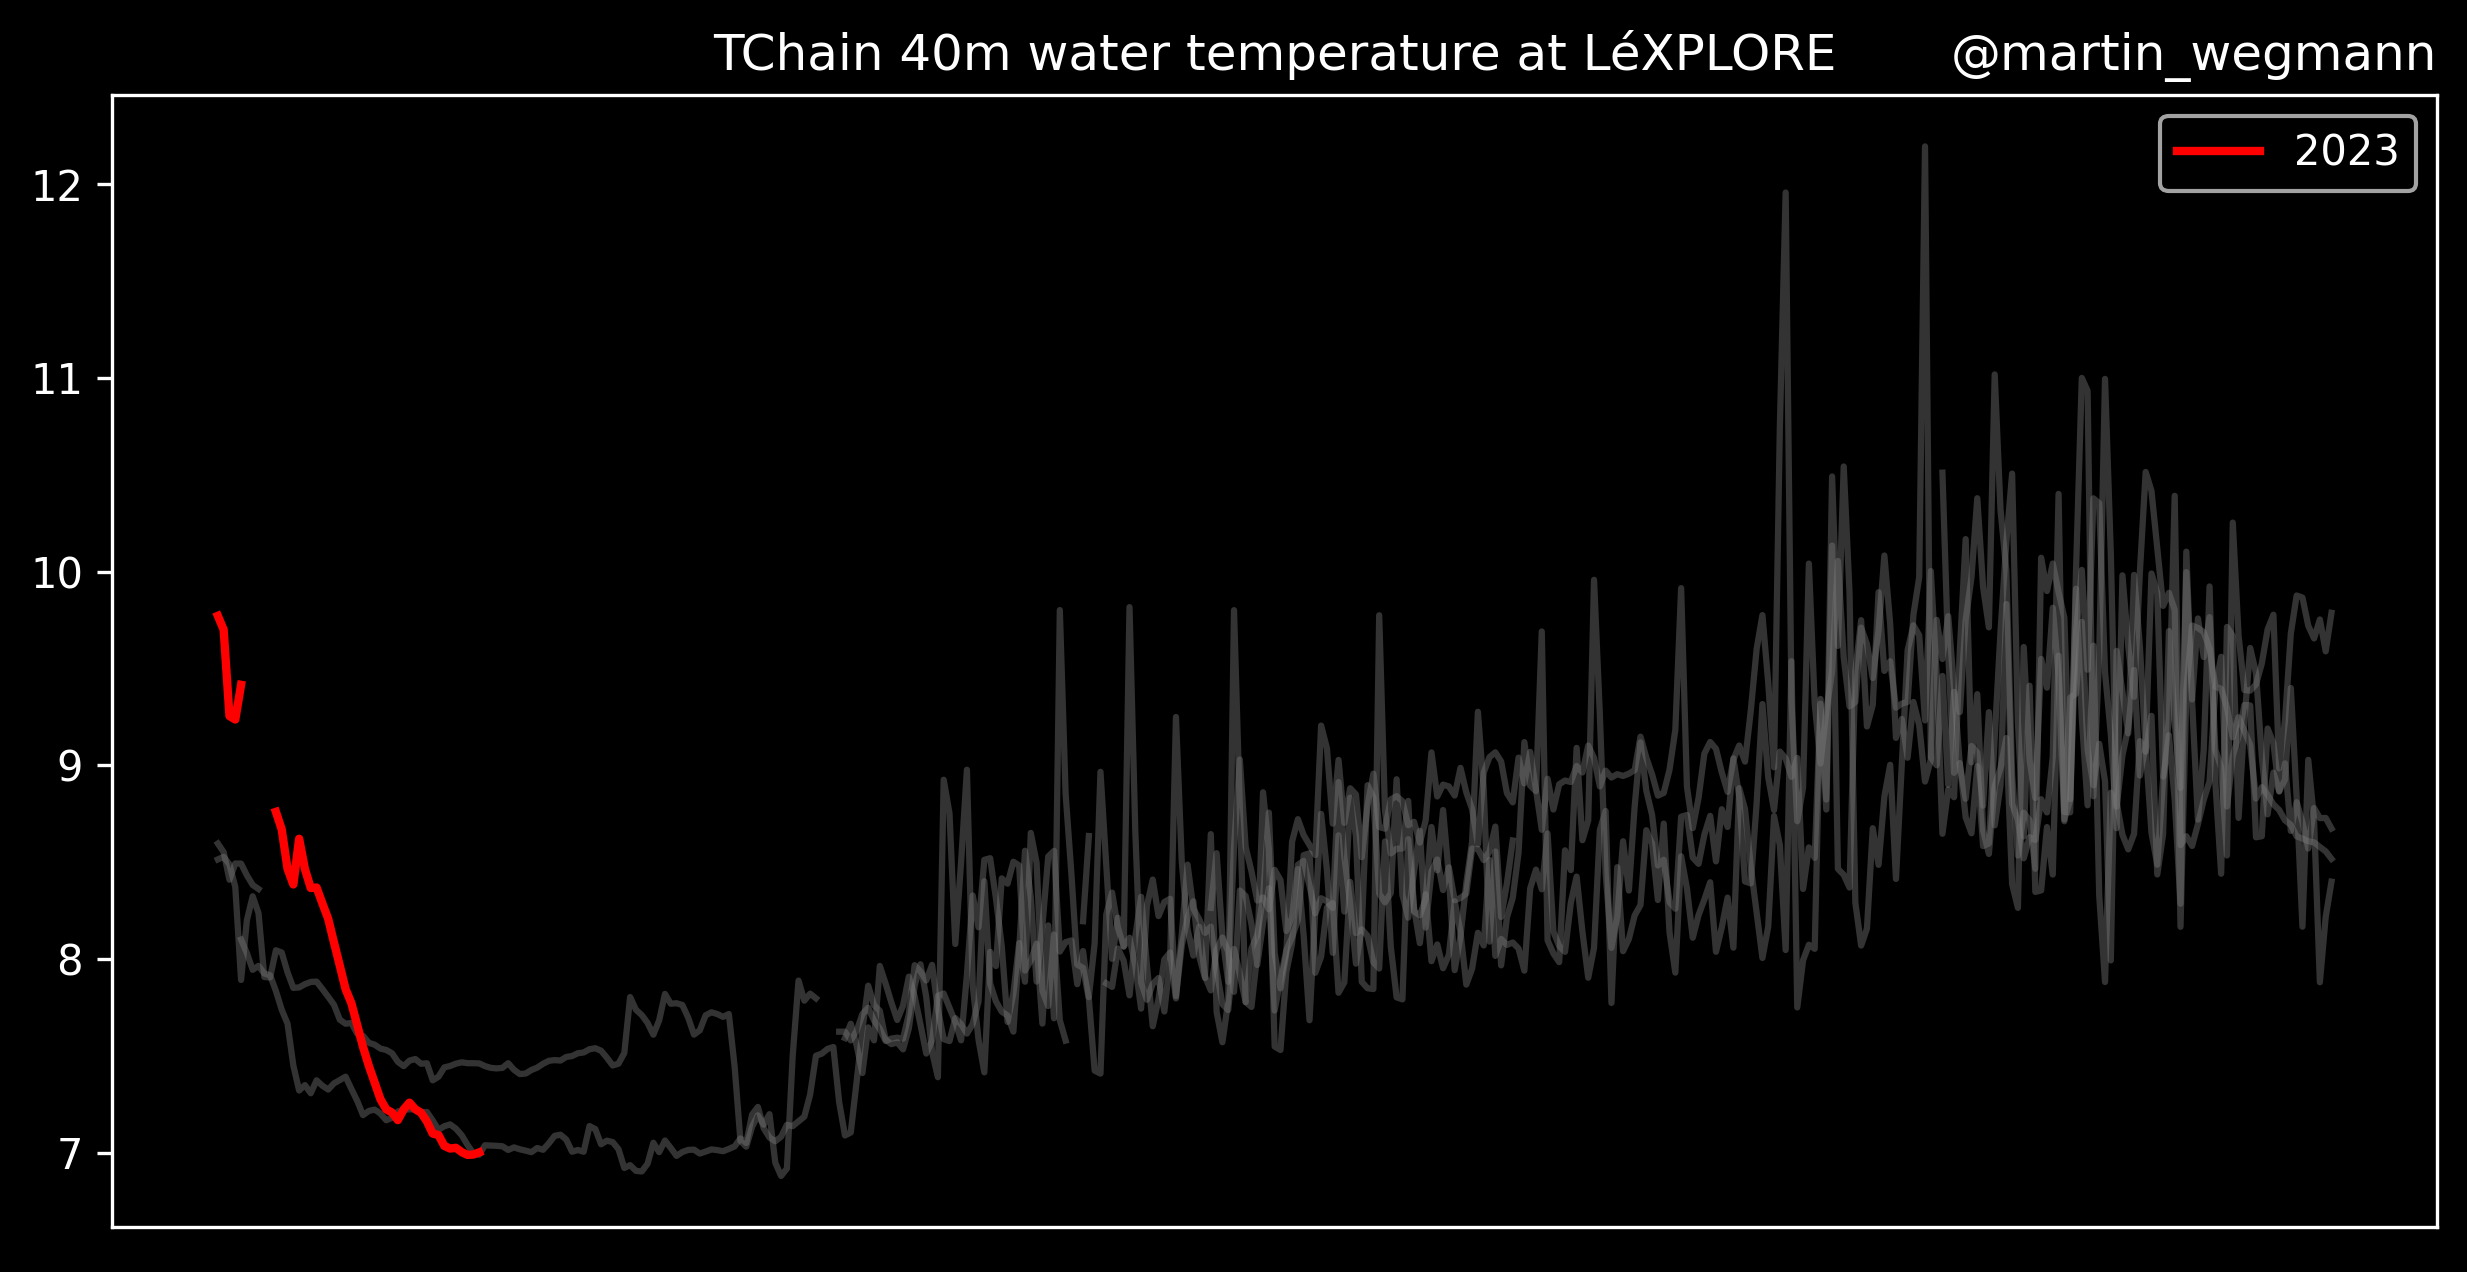

In [39]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5), dpi= 300)
tchain_l1_orig_daily_2019.plot(color="gray", alpha=0.4)
tchain_l1_orig_daily_2020.plot(color="gray", alpha=0.4)
tchain_l1_orig_daily_2021.plot(color="gray", alpha=0.4)
tchain_l1_orig_daily_2022.plot(color="gray", alpha=0.4)
tchain_l1_orig_daily_2023.plot(color="red",lw=2,label="2023")
plt.title("")
plt.xlabel("")
plt.ylabel("")
#plt.xticks(rotation = 90)
ax = plt.gca()
ax.set_xticklabels(['01-01', '', '',"","","",'31-12'])
ax.set_xticks([])
dataset="TChain"
variable="40m water temperature"
region="LéXPLORE"
copyright="@martin_wegmann"
title=dataset+" "+variable+" at "+region
plt.title(title)
plt.title(copyright,loc="right")
plt.legend()



plt.savefig(output_folder+"daily_40m_temp_TChain.pdf")
plt.savefig(output_folder+"daily_40m_temp_TChain.png")











### meteo

In [40]:
os.chdir("/Volumes/lexplore_hd/core_data/meteostation/data/")

In [41]:
!python /Volumes/lexplore_hd/core_data/meteostation/scripts/download_remote_data.py -w



Attempting to sync s3://eawag-data/renkulab.io/lexplore/meteostation/data with /Volumes/lexplore_hd/core_data/meteostation/data
download: s3://eawag-data/renkulab.io/lexplore/meteostation/data/Level0/LeXPLORE_WS_Lexplore_Weather_2023-07-04.dat to Level0/LeXPLORE_WS_Lexplore_Weather_2023-07-04.dat

download: s3://eawag-data/renkulab.io/lexplore/meteostation/data/Level1/L1_Meteostation_20230703_000000.nc to Level1/L1_Meteostation_20230703_000000.nc

Download complete.


In [42]:
meteo_folder="/Volumes/lexplore_hd/core_data/meteostation/data/Level1/"
files_meteo = [meteo_folder+filename for filename in rm_point(os.listdir(meteo_folder))]

In [43]:

meteo_all=xr.open_mfdataset(files_meteo,engine="netcdf4")

In [44]:
meteo_all_daily=meteo_all.resample(time="1D").mean()

In [45]:
meteo_all_daily_2019=meteo_all_daily.sel(time=slice("2019-01-01", "2019-12-31")).AirTC[:-1]
meteo_all_daily_2020=meteo_all_daily.sel(time=slice("2020-01-01", "2020-12-31")).AirTC[0:365]
meteo_all_daily_2021=meteo_all_daily.sel(time=slice("2021-01-01", "2021-12-31")).AirTC[0:365]
meteo_all_daily_2022=meteo_all_daily.sel(time=slice("2022-01-01", "2022-12-31")).AirTC[0:365]
meteo_all_daily_2023=meteo_all_daily.sel(time=slice("2023-01-01", today_string2)).AirTC

In [46]:
meteo_all_daily_2019["time"] = ("time", meteo_all_daily_2020.sel(time=slice("2020-07-29", "2020-12-31")).time.values)#
meteo_all_daily_2021["time"] = ("time", meteo_all_daily_2020.time.values)#
meteo_all_daily_2022["time"] = ("time", meteo_all_daily_2020.time.values)#
meteo_all_daily_2023["time"] = ("time", meteo_all_daily_2020.time.values[0:len(meteo_all_daily_2023.time.values)])#

/Users/mwegmann/miniconda2/envs/temprec/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


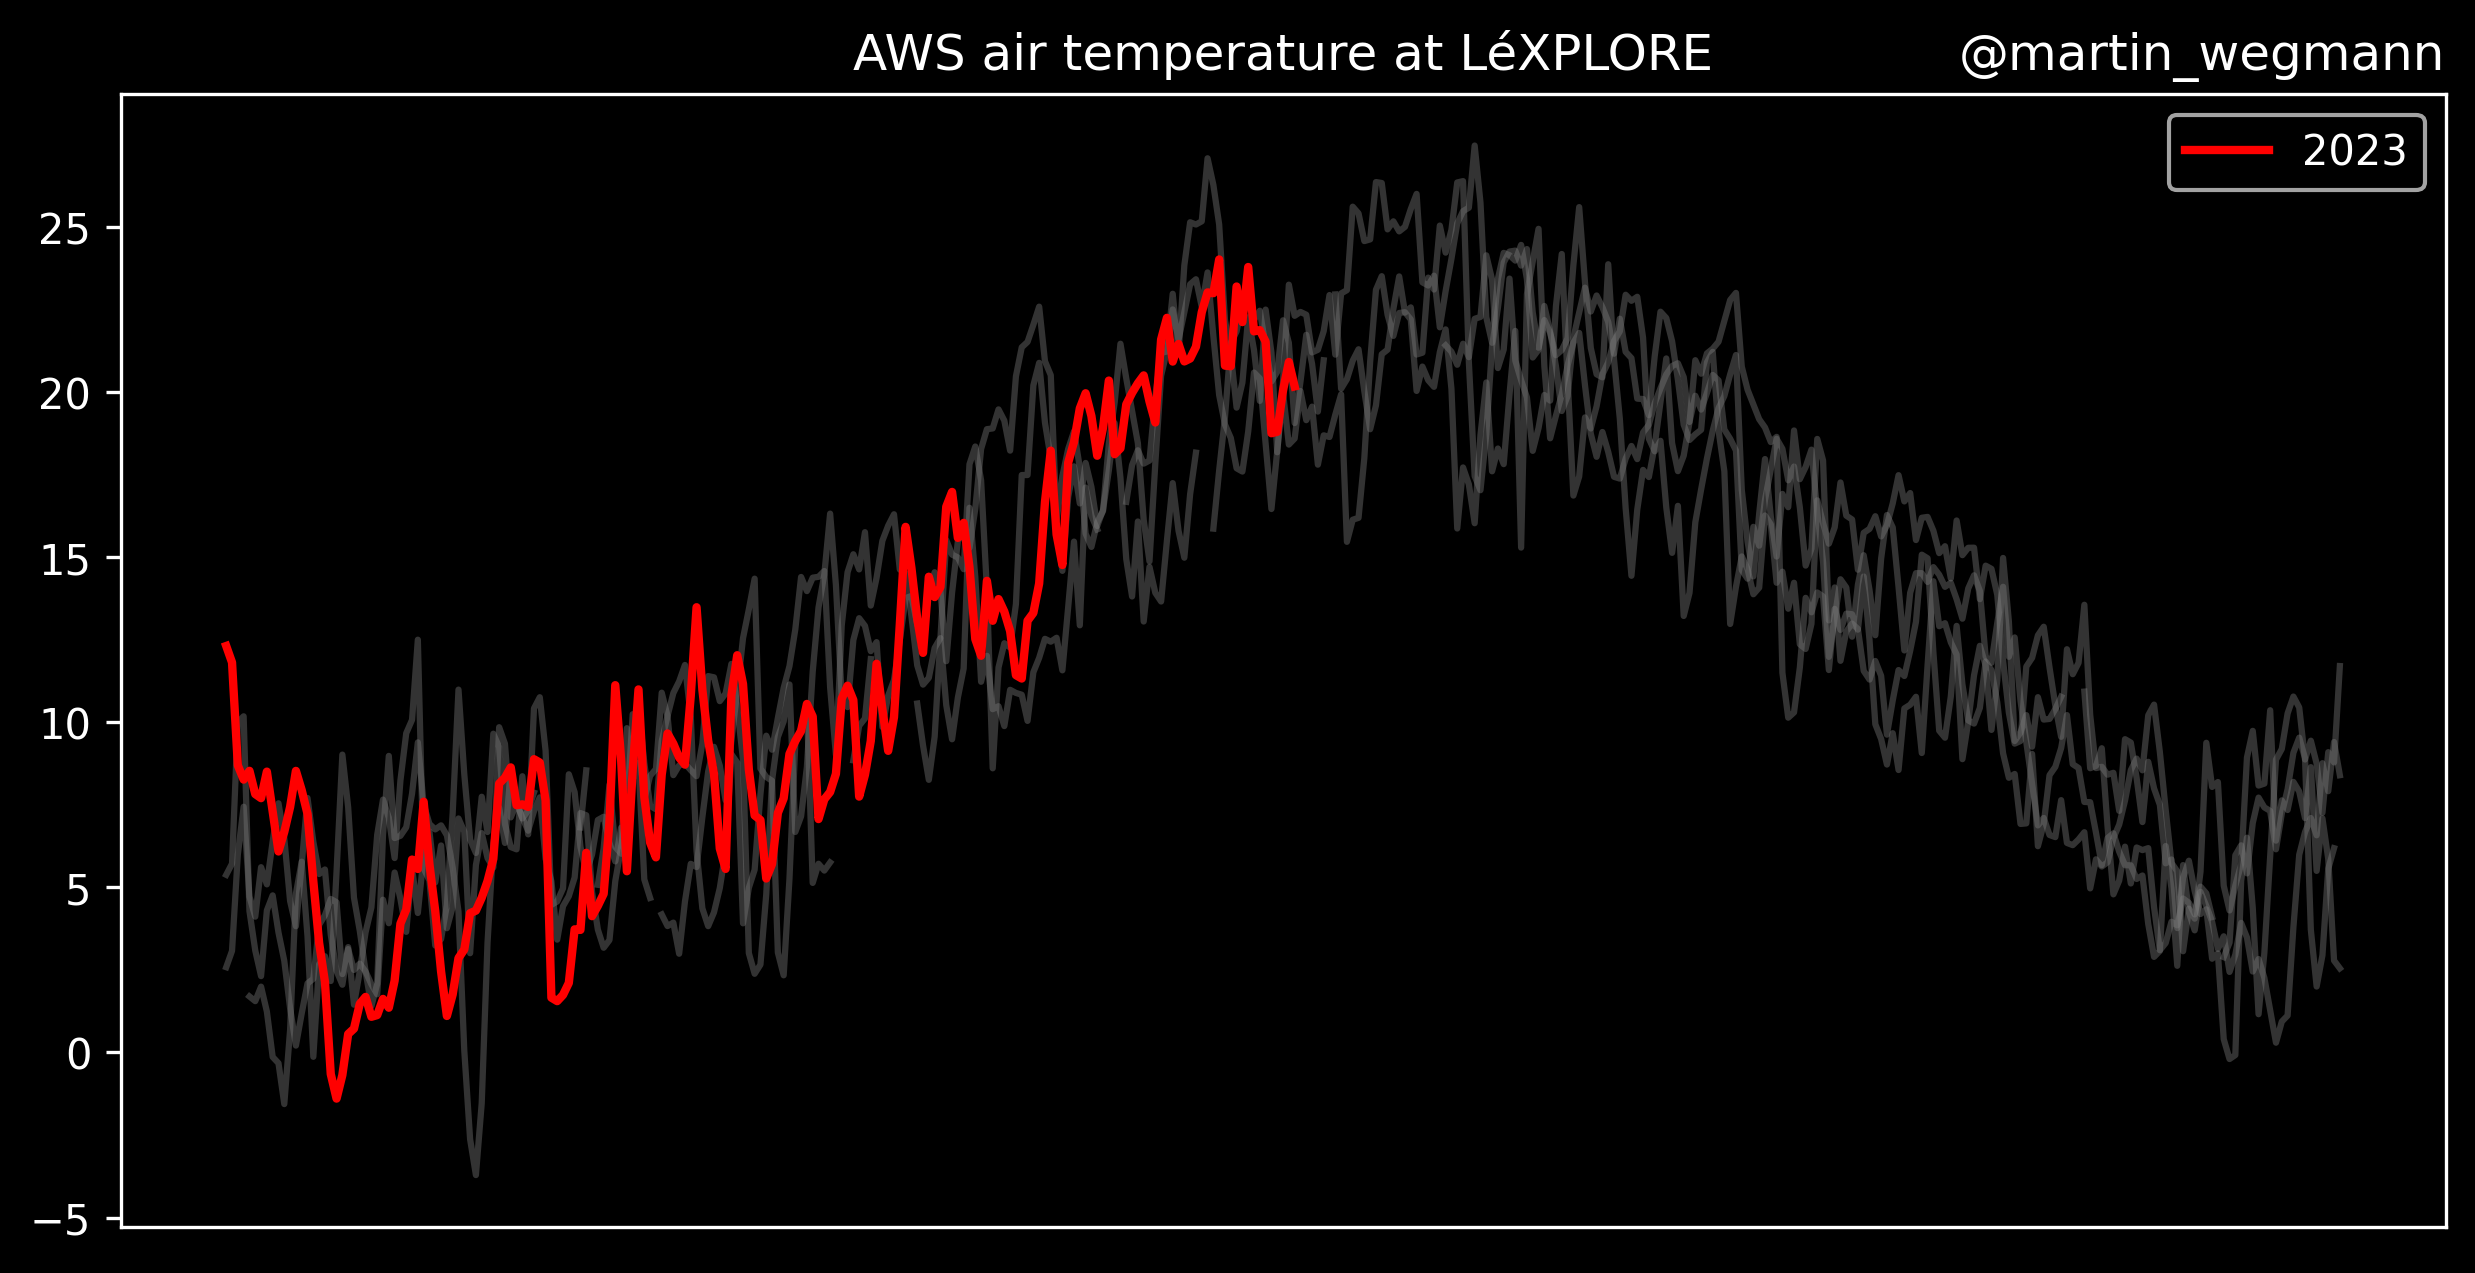

In [47]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5), dpi= 300)
meteo_all_daily_2019.plot(color="gray", alpha=0.4)
meteo_all_daily_2020.plot(color="gray", alpha=0.4)
meteo_all_daily_2021.plot(color="gray", alpha=0.4)
meteo_all_daily_2022.plot(color="gray", alpha=0.4)
meteo_all_daily_2023.plot(color="red",lw=2,label="2023")
plt.title("")
plt.xlabel("")
plt.ylabel("")
#plt.xticks(rotation = 90)
ax = plt.gca()
ax.set_xticklabels(['01-01', '01-03', '01-05',"01-07","01-09","01-11",'01-01'])
ax.set_xticks([])#
#ax.set_xticks([])
#ax.set_yticks([])
dataset="AWS"
variable="air temperature"
region="LéXPLORE"
copyright="@martin_wegmann"
title=dataset+" "+variable+" at "+region
plt.title(title)
plt.title(copyright,loc="right")
plt.legend()



plt.savefig(output_folder+"daily_meteostation_temp.pdf")
plt.savefig(output_folder+"daily_meteostation_temp.png")







